# Physics-Based Scene Simulation: Visualization

This notebook visualizes the balance dynamics of a two-legged standing body using an inverted pendulum model. 
It imports simulation data from `body_model.py` and generates an animated visualization.


In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys

# Import the simulation function from src directory
sys.path.append(r"C:\Users\Admin\Documents\Michigan MSU\Spring 2025\CMSE 802\Project\cmse802_project\src\physics")

from body_model import simulate_balance


In [2]:
# Run the simulation and obtain data
time, theta_vals, x_torso_vals, y_torso_vals = simulate_balance()


<IPython.core.display.Javascript object>


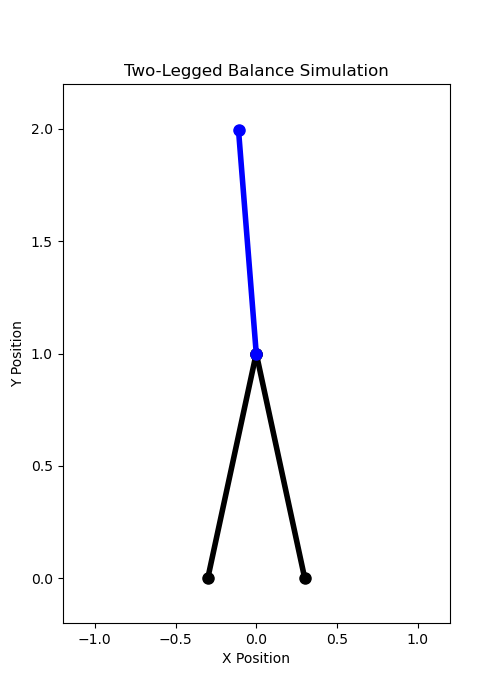

In [3]:
# Create animation of the two-legged standing balance model
fig, ax = plt.subplots(figsize=(5, 7))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.2, 2.2)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Two-Legged Balance Simulation")

# Initialize the body as a stick figure (legs and torso)
leg1_line, = ax.plot([], [], 'o-', lw=4, markersize=8, color='black')
leg2_line, = ax.plot([], [], 'o-', lw=4, markersize=8, color='black')
torso_line, = ax.plot([], [], 'o-', lw=4, markersize=8, color='blue')

# Fixed foot positions
foot1_x, foot1_y = -0.3, 0
foot2_x, foot2_y = 0.3, 0


In [4]:
def init():
    leg1_line.set_data([], [])
    leg2_line.set_data([], [])
    torso_line.set_data([], [])
    return leg1_line, leg2_line, torso_line


In [5]:
def update(frame):
    # Foot to hip (both legs)
    x_leg1 = [foot1_x, (foot1_x + foot2_x) / 2]  # Midpoint represents the hip
    y_leg1 = [foot1_y, 1.0]

    x_leg2 = [foot2_x, (foot1_x + foot2_x) / 2]  # Same for second leg
    y_leg2 = [foot2_y, 1.0]

    # Hip to head (torso)
    x_torso = [(foot1_x + foot2_x) / 2, x_torso_vals[frame]]
    y_torso = [1.0, y_torso_vals[frame]]

    leg1_line.set_data(x_leg1, y_leg1)
    leg2_line.set_data(x_leg2, y_leg2)
    torso_line.set_data(x_torso, y_torso)
    return leg1_line, leg2_line, torso_line


In [6]:
ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True, interval=20)

plt.show()
